Imports.

In [2]:
from __future__ import division

import numpy as np
import pandas as pd
from matplotlib import pyplot as p
import seaborn as sns
sns.set_style('ticks')
sns.set_palette('muted')

Read in the file. Isolate the column I care about ("HW", for the sensor at Hawthorne Elementary), crop off the column header rows, and convert strings to floats.  Create the date range for the pandas time series (hourly, starting at midnight on 1 Jan). Create the series.

In [3]:
x = pd.read_csv('2016-PM2.5.csv')
#print x.shape
hw = np.array(map(float, x['HW'][2:]))
rng = pd.date_range('1/1/2016', periods=x.shape[0]-2, freq='H')
ts = pd.Series(hw, index=rng)

Plot the data; make the plot look nice.

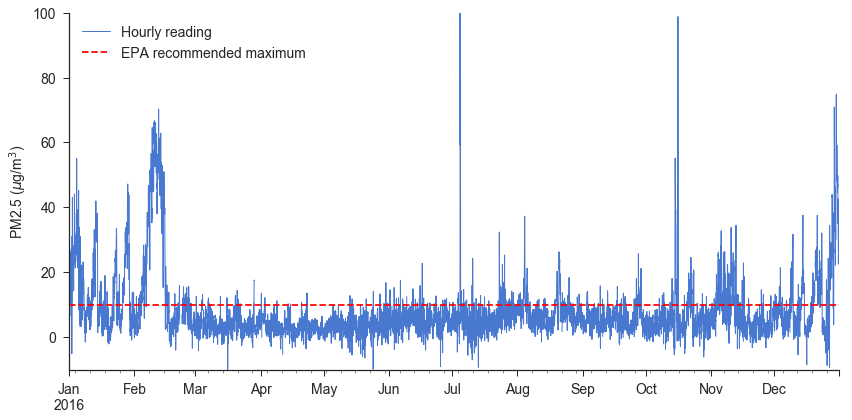

In [60]:
f = p.figure(figsize=[12,6])
ts.plot(label='Hourly reading', linewidth=1)
p.axhline(10, linestyle='--', color='red', label='EPA recommended maximum')
p.tick_params(labelsize=14)
p.ylabel(r'PM2.5 ($\mu$g/m$^3$)', size=14)
p.ylim([-10,100])
p.legend(prop={'size':14})
sns.despine()
p.tight_layout()

In [4]:
print 'Fraction of year above EPA guidelines for PM2.5 max: %.03f' % (sum(hw[np.isfinite(hw)] > 10) / len(hw))
print 'PM2.5 annual mean: %.03f' % np.nanmean(hw)

Fraction of year above EPA guidelines for PM2.5 max: 0.195
PM2.5 annual mean: 7.975
